In [12]:
from PyPDF2 import PdfReader, PdfWriter

input_pdf = r'Mobile_dataset.pdf'  # Your 162,000-page PDF
output_pdf = 'call_logs.pdf'  # Output subset PDF

start_page, end_page = 97, 205  # Example: Extract pages 100 to 200

reader = PdfReader(input_pdf)
writer = PdfWriter()

for i in range(start_page, end_page + 1):
    writer.add_page(reader.pages[i])

with open(output_pdf, "wb") as f:
    writer.write(f)

print("Subset PDF saved as", output_pdf)

Subset PDF saved as call_logs.pdf


In [1]:
import pdfplumber
import pandas as pd

# Path to the uploaded PDF
pdf_path = "call_logs.pdf"

# Extract text from the PDF
extracted_text = ""
table_data = []

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            extracted_text += text + "\n"  # Store text
        tables = page.extract_tables()
        if tables:
            table_data.extend(tables)  # Store tables

# Display first 1000 characters of extracted text and first 2 tables if available
extracted_text[:1000], table_data[:2]

('5 From: 19-12-2024 00:00:00 Missed Source: WhatsApp\n919404080037@s.what 03:17:40(UTC+0) Account:\nsapp.net 919067681955@s.whatsapp.net\nD S Dahare\nTo:\nDirection:\nIncoming\n6 From: 18-12-2024 00:00:00 Missed Yes Source: WhatsApp\n919552473531@s.what 11:09:37(UTC+0) Account:\nsapp.net 919067681955@s.whatsapp.net\npushpachanne\nTo:\nDirection:\nIncoming\n7 From: 10-12-2024 00:00:00 Rejected Source: WhatsApp\n919067681955@s.what 15:40:33(UTC+0) Account:\nsapp.net 919067681955@s.whatsapp.net\nKushagra Selokar\nTo:\n917823003510@s.what\nsapp.net\nAnanya\nDirection:\nOutgoing\n8 From: 10-12-2024 00:00:00 Rejected Yes Source: WhatsApp\n919067681955@s.what 15:29:50(UTC+0) Account:\nsapp.net 919067681955@s.whatsapp.net\nKushagra Selokar\nTo:\n918975220612@s.what\nsapp.net\nJasmit Rcoem\nDirection:\nOutgoing\n9 From: 07-12-2024 00:00:00 Missed Source: WhatsApp\n919822326562@s.what 16:00:34(UTC+0) Account:\nsapp.net 919067681955@s.whatsapp.net\nKunika Bhutada\nTo:\nDirection:\nIncoming\n10 F

In [2]:
# Flatten table
flattened_data = [row for table in table_data for row in table]

# Map to PDF column headers
columns = ["#", "Parties", "Timestamp", "Duration", "Status", "Country code", "Network", "Video call", "Source Info","Deleted"]

# Create DataFrame
df = pd.DataFrame(flattened_data, columns=columns)

# Clean newlines and whitespaces
df = df.applymap(lambda x: x.replace('\n', ' ').strip() if isinstance(x, str) else x)

# Display sample
df.head(10)

C:\Users\Yash lichade\AppData\Local\Temp\ipykernel_4072\2333394696.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\n', ' ').strip() if isinstance(x, str) else x)


,#,Parties,Timestamp,Duration,Status,Country code,Network,Video call,Source Info,Deleted
0,5,From: 919404080037@s.what sapp.net D S Dahare ...,19-12-2024 03:17:40(UTC+0),00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
1,6,From: 919552473531@s.what sapp.net pushpachann...,18-12-2024 11:09:37(UTC+0),00:00:00,Missed,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,
2,7,From: 919067681955@s.what sapp.net Kushagra Se...,10-12-2024 15:40:33(UTC+0),00:00:00,Rejected,,,,Source: WhatsApp Account: 919067681955@s.whats...,
3,8,From: 919067681955@s.what sapp.net Kushagra Se...,10-12-2024 15:29:50(UTC+0),00:00:00,Rejected,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,
4,9,From: 919822326562@s.what sapp.net Kunika Bhut...,07-12-2024 16:00:34(UTC+0),00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
5,10,From: 919067681955@s.what sapp.net Kushagra Se...,01-12-2024 15:35:52(UTC+0),00:00:39,Answered,,,,Source: WhatsApp Account: 919067681955@s.whats...,
6,11,From: 917972105037@s.what sapp.net Anu Tai To:...,27-11-2024 17:31:07(UTC+0),00:00:00,Missed,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,
7,12,From: 919822326562@s.what sapp.net Kunika Bhut...,26-11-2024 07:05:22(UTC+0),00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
8,13,From: 919822326562@s.what sapp.net Kunika Bhut...,25-11-2024 04:02:42(UTC+0),00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
9,14,From: 919822326562@s.what sapp.net Kunika Bhut...,25-11-2024 03:36:17(UTC+0),00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,


In [5]:
df.to_csv("cleaned_call_logs.csv", index=False)

In [4]:
df1.head()

NameError: name 'df1' is not defined

In [6]:
df.head(1)

,#,Parties,Timestamp,Duration,Status,Country code,Network,Video call,Source Info,Deleted
0,5,From: 919404080037@s.what sapp.net D S Dahare ...,19-12-2024 03:17:40(UTC+0),00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   #             1493 non-null   object
 1   Parties       1493 non-null   object
 2   Timestamp     1493 non-null   object
 3   Duration      1493 non-null   object
 4   Status        1493 non-null   object
 5   Country code  1493 non-null   object
 6   Network       1493 non-null   object
 7   Video call    1493 non-null   object
 8   Source Info   1493 non-null   object
 9   Deleted       1493 non-null   object
dtypes: object(10)
memory usage: 116.8+ KB


In [7]:
# Ensure all values in Timestamp column are strings
df["Timestamp"] = df["Timestamp"].astype(str)

# Remove timezone info like (UTC+0), if present
df["Timestamp"] = df["Timestamp"].str.replace(r"\(UTC\+\d+\)", "", regex=True).str.strip()

In [8]:
df.head(100)

,#,Parties,Timestamp,Duration,Status,Country code,Network,Video call,Source Info,Deleted
0,5,From: 919404080037@s.what sapp.net D S Dahare ...,19-12-2024 03:17:40,00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
1,6,From: 919552473531@s.what sapp.net pushpachann...,18-12-2024 11:09:37,00:00:00,Missed,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,
2,7,From: 919067681955@s.what sapp.net Kushagra Se...,10-12-2024 15:40:33,00:00:00,Rejected,,,,Source: WhatsApp Account: 919067681955@s.whats...,
3,8,From: 919067681955@s.what sapp.net Kushagra Se...,10-12-2024 15:29:50,00:00:00,Rejected,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,
4,9,From: 919822326562@s.what sapp.net Kunika Bhut...,07-12-2024 16:00:34,00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
...,...,...,...,...,...,...,...,...,...,...
95,100,From: 919067681955@s.what sapp.net Kushagra Se...,21-06-2024 07:41:10,00:00:00,Not answered,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,
96,101,From: 917249865054@s.what sapp.net Shlesha To:...,19-06-2024 15:03:52,00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
97,102,From: 917249865054@s.what sapp.net Shlesha To:...,19-06-2024 15:03:42,00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,
98,103,From: 917249865054@s.what sapp.net Shlesha To:...,19-06-2024 13:41:07,00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,


In [9]:
import pandas as pd
import re

# Step 1: Clean and convert Timestamp
df["Timestamp"] = df["Timestamp"].str.replace(r"\(UTC\+\d+\)", "", regex=True).str.strip()

df["Timestamp"] = pd.to_datetime(
    df["Timestamp"], 
    format="%d-%m-%Y %H:%M:%S", 
    errors="coerce"
)

In [10]:
# Step 2: Extract time-based features
df["Date"] = df["Timestamp"].dt.date
df["Time"] = df["Timestamp"].dt.time
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day_name()

In [11]:
# Step 3: Identify night calls (11 PM to 5 AM)
df["Is_Night_Call"] = df["Hour"].apply(lambda x: 1 if x >= 22 or x <= 5 else 0)


In [12]:
import re

def extract_number_and_name(text):
    match = re.search(r'From:\s*([\d@\.]+)\s*(.*)', text)
    number = match.group(1).strip() if match else None
    name = match.group(2).strip() if match and match.group(2) else None
    return pd.Series([number, name])

df[['PhoneNumber', 'Name']] = df['Parties'].apply(extract_number_and_name)

In [13]:
# Step 4: Drop or inspect invalid timestamps
invalid_timestamps = df[df["Timestamp"].isna()]
print(f"Invalid timestamps found: {len(invalid_timestamps)}")

# Optionally drop them
# df = df.dropna(subset=["Timestamp"])


Invalid timestamps found: 1080


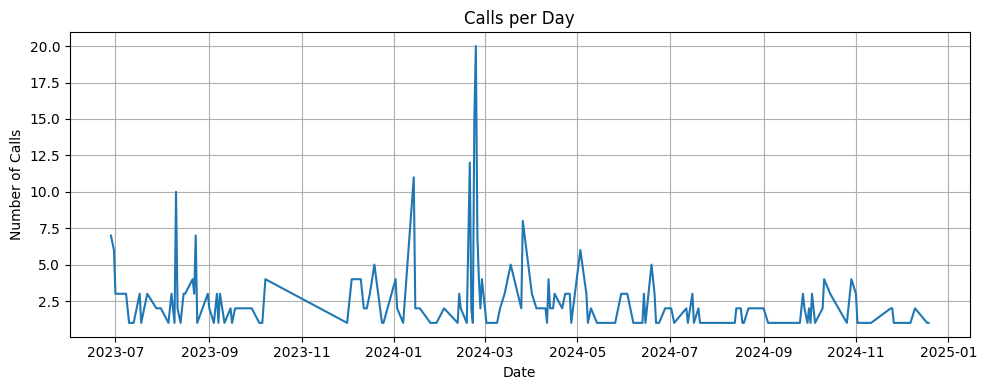

In [14]:
# Number of calls per day
calls_per_day = df.groupby("Date").size()

# Optional: Plot
import matplotlib.pyplot as plt

calls_per_day.plot(kind="line", figsize=(10, 4), title="Calls per Day")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
df.head()

,#,Parties,Timestamp,Duration,Status,Country code,Network,Video call,Source Info,Deleted,Date,Time,Hour,Day,Is_Night_Call,PhoneNumber,Name
0,5,From: 919404080037@s.what sapp.net D S Dahare ...,2024-12-19 03:17:40,00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,,2024-12-19,03:17:40,3.0,Thursday,1,919404080037@,s.what sapp.net D S Dahare To: Direction: Inco...
1,6,From: 919552473531@s.what sapp.net pushpachann...,2024-12-18 11:09:37,00:00:00,Missed,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,,2024-12-18,11:09:37,11.0,Wednesday,0,919552473531@,s.what sapp.net pushpachanne To: Direction: In...
2,7,From: 919067681955@s.what sapp.net Kushagra Se...,2024-12-10 15:40:33,00:00:00,Rejected,,,,Source: WhatsApp Account: 919067681955@s.whats...,,2024-12-10,15:40:33,15.0,Tuesday,0,919067681955@,s.what sapp.net Kushagra Selokar To: 917823003...
3,8,From: 919067681955@s.what sapp.net Kushagra Se...,2024-12-10 15:29:50,00:00:00,Rejected,,,Yes,Source: WhatsApp Account: 919067681955@s.whats...,,2024-12-10,15:29:50,15.0,Tuesday,0,919067681955@,s.what sapp.net Kushagra Selokar To: 918975220...
4,9,From: 919822326562@s.what sapp.net Kunika Bhut...,2024-12-07 16:00:34,00:00:00,Missed,,,,Source: WhatsApp Account: 919067681955@s.whats...,,2024-12-07,16:00:34,16.0,Saturday,0,919822326562@,s.what sapp.net Kunika Bhutada To: Direction: ...


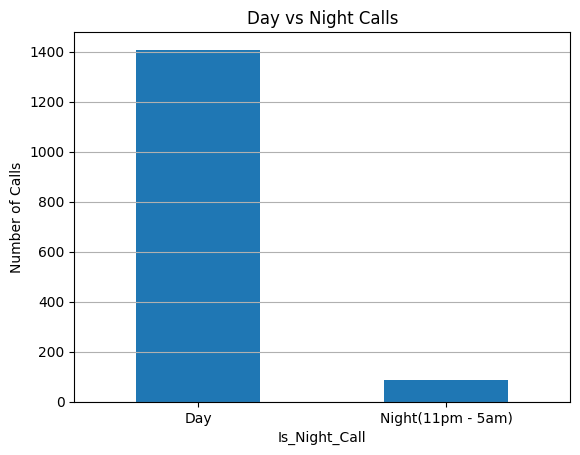

In [16]:
# Count of night vs day calls
night_summary = df["Is_Night_Call"].value_counts().rename({0: "Day", 1: "Night(11pm - 5am)"})

night_summary.plot(kind="bar", title="Day vs Night Calls")
plt.ylabel("Number of Calls")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

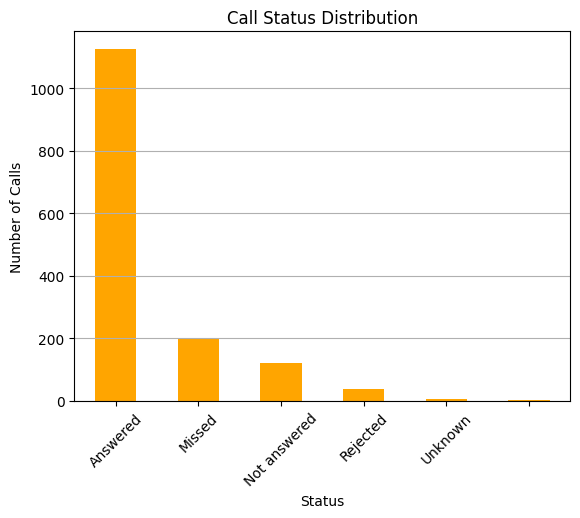

In [17]:
status_counts = df["Status"].value_counts()

status_counts.plot(kind="bar", title="Call Status Distribution", color="orange")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

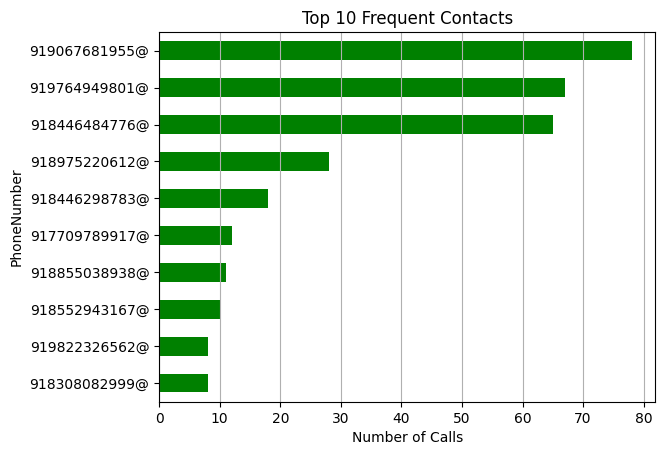

In [18]:
top_contacts = df["PhoneNumber"].value_counts().head(10)

top_contacts.plot(kind="barh", title="Top 10 Frequent Contacts", color="green")
plt.xlabel("Number of Calls")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

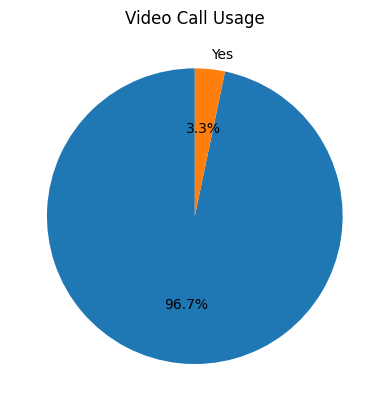

In [19]:
video_call_stats = df["Video call"].value_counts()

video_call_stats.plot(kind="pie", autopct='%1.1f%%', title="Video Call Usage", startangle=90)
plt.ylabel("")
plt.show()

In [22]:
import pandas as pd

# Convert Duration to seconds
def duration_to_seconds(d):
    try:
        h, m, s = map(int, d.split(":"))
        return h * 3600 + m * 60 + s
    except:
        return 0

df["DurationSeconds"] = df["Duration"].apply(duration_to_seconds)

# Label types
df["IsMissed"] = df["Status"].str.lower() == "missed"
df["IsRejected"] = df["Status"].str.lower() == "rejected"
df["IsVideoCall"] = df["Video call"].str.lower() == "yes"
df["Hour"] = pd.to_datetime(df["Timestamp"]).dt.hour
df["IsNightCall"] = df["Hour"].between(0, 5)

# Group summary per PhoneNumber
grouped = df.groupby("PhoneNumber").agg({
    "DurationSeconds": ["count", "sum", "mean"],
    "IsMissed": "sum",
    "IsRejected": "sum",
    "IsNightCall": "sum",
    "IsVideoCall": "sum"
}).reset_index()

grouped.columns = ["PhoneNumber", "TotalCalls", "TotalDuration", "AvgDuration", 
                   "MissedCalls", "RejectedCalls", "NightCalls", "VideoCalls"]

# Prepare summaries for LLM
def format_summary(row):
    return f"""
    Contact: {row['PhoneNumber']}
    Total Calls: {row['TotalCalls']}
    Missed Calls: {row['MissedCalls']}
    Rejected Calls: {row['RejectedCalls']}
    Night Calls: {row['NightCalls']}
    Video Calls: {row['VideoCalls']}
    Total Duration: {row['TotalDuration']} seconds
    Average Duration: {row['AvgDuration']:.1f} seconds
    """

summaries = grouped.apply(format_summary, axis=1).tolist()

In [23]:
import ollama

prompt_template = """
You are a digital forensic psychologist.

Analyze the following call behavior of a WhatsApp contact and assess:
1. The person's mental health condition.
2. Whether this call pattern might indicate criminal intent or suspicious activity.
3. Give reasons for your assessment.

### Call Behavior Summary:
{summary}

Respond in this format:
- PhoneNumber:
- Mental Health Insight:
- Criminal Intent Risk:
- Explanation:
"""

results = []

for summary in summaries:
    prompt = prompt_template.format(summary=summary)
    response = ollama.chat(model="mistral", messages=[
        {"role": "user", "content": prompt}
    ])
    results.append(response["message"]["content"])

ResponseError: model requires more system memory (4.8 GiB) than is available (2.2 GiB) (status code: 500)